# 第4章 （3）決定木

機械学習には多くの手法が存在する．近年，高い認識精度を誇るDeep Learningが有名であるが，欠点としてブラックボックスとなってしまうということがある．つまり，入力に対して所望の出力を行うことができるが，その理由はわからないため，人間が意思決定するときの判断基準に困るという点がある．

一方，決定木は認識精度ではDeep Learningに劣ってしまうが，決定木によって判定されるため，その意味理解が可能である点に特徴がある．

ここでは，決定木について説明を行う．

## 決定木の例

ある人（Aさん）が感じる夏の暑さと，温度と湿度のデータが与えられたとする．

In [1]:
# データ
# 温度，湿度，暑い(1)or暑くない(0)
import numpy as np

data = np.array([
    [17,40,0],
    [19,43,0],
    [20,64,0],
    [23,56,0],
    [28,72,1],
    [28,49,0],
    [29,58,0],
    [30,67,1],
    [31,49,1],
    [33,62,1],
    [35,48,1]])

In [2]:
data[:,0]

array([17, 19, 20, 23, 28, 28, 29, 30, 31, 33, 35])

In [3]:
data[:,1]

array([40, 43, 64, 56, 72, 49, 58, 67, 49, 62, 48])

In [4]:
data[:,2]

array([0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1])

In [5]:
# リスト内包表記で0を'b'に，1を'r'に変換
['b' if i==0 else 'r' for i in data[:,2]]

['b', 'b', 'b', 'b', 'r', 'b', 'b', 'r', 'r', 'r', 'r']

In [6]:
import matplotlib.pyplot as plt

plt.scatter(data[:,0], data[:,1],s=100,c=['b' if i==0 else 'r' for i in data[:,2]])
# グリッド表示
plt.grid(True)

# 表示
plt.show()

<Figure size 640x480 with 1 Axes>

<img src="work/1.png" width="400">

例えば，気温が29度で，湿度が58%のとき，Aさんは「暑くない」ということを表している．  
このデータから，「温度と湿度がどのようなときに，暑いと感じるのか，暑くないと感じるのか」を決定木で判定したいとする．
すると，以下のような決定木が考えられる．

<img src="work/2.png" width="300">

この決定木の条件で，気温と湿度のグラフに線を引くと以下のようになる．

<img src="work/3.png" width="400">

決定木によって，領域分割される．この領域に色を塗ると以下のようになる．

<img src="work/4.png" width="400">

つまり，決定木に温度と湿度を与えると，「暑い」or「暑くない」を判定することができる．

# 決定木の仕組み

決定木のアルゴリズムについて，その仕組みを説明する．

## ノードの分割

各ノードは，データを分割するルールを求めることになる．上記の例だと，2次元の特徴ベクトルがあるので，温度でわけるか，湿度でわけるか決定した後，いくらの値で分割するか決定することになる．

つまり，各ノードにおける$d$次元特徴空間の最適な分割は，特徴軸ごとに可能な考え得る分割を，不純度と呼ばれる評価関数で評価し選択する．

ある特徴軸が連続値の属性をもつ場合でも，学習データ数が$N$であれば，$N-1$の離散的な分割候補点があるだけである．つまり，隣り合った2点の中点を，その特徴軸の分割候補点に一つにすれば良い．

## ジニ係数

不純度を表す評価関数は，「誤り率」，「交差エントロピー」など様々あるが，一般的にはジニ係数を用いることが多い．

ジニ係数を以下に示す．

$$
\begin{align}
I_G(t) &= \sum_{j\neq i}P(C_i|t)P(C_j|t) \\
&=\sum_{i=1}^K P(C_i|t)(1-P(C_i|t) \\
&=1-\sum_{i=1}^K P^2(C_i|t)
\end{align}
$$

ノード$t$で分割規則を作るとき，不純度の減り方が一番大きな分割を選べば良い．

# 決定木の実装

In [7]:
# データ
# 温度，湿度，暑い(1)or暑くない(0)
import numpy as np

data = np.array([
    [17,40,0],
    [19,43,0],
    [20,64,0],
    [23,56,0],
    [28,72,1],
    [28,49,0],
    [29,58,0],
    [30,67,1],
    [31,49,1],
    [33,62,1],
    [35,48,1]])

### 深さ1の決定木

In [ ]:
from sklearn import tree

# 決定木に特徴ベクトルと教師信号を与える
X = data[:,[0,1]]
y = data[:,2]

# モデルを作成
model = tree.DecisionTreeClassifier(max_depth=1)
model = model.fit(X, y)

predicted = model.predict(X)

In [9]:
tree.export_graphviz(model, out_file = 'temp.dot')
# dot -Tpdf temp.dot -o temp.pdf
# dot -Tjpg temp.dot -o temp.jpg

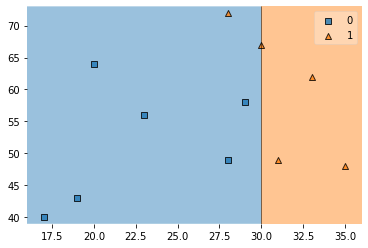

In [10]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X, y, model)

![depth1](work/depth1.jpg)

### 深さ2の決定木

In [12]:
from sklearn import tree

# 決定木に特徴ベクトルと教師信号を与える
X = data[:,[0,1]]
y = data[:,2]

# モデルを作成
model = tree.DecisionTreeClassifier(max_depth=2)
model = model.fit(X, y)

predicted = model.predict(X)

In [13]:
tree.export_graphviz(model, out_file = 'temp.dot')
# dot -Tpdf temp.dot -o temp.pdf
# dot -Tjpg temp.dot -o temp.jpg

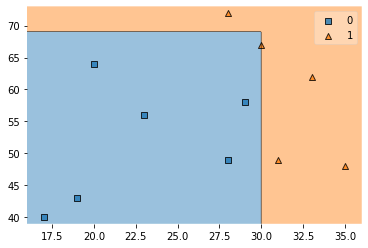

In [14]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X, y, model)

![depth2](work/depth2.jpg)

## 入力データを変更して，いろいろ試してみよう．

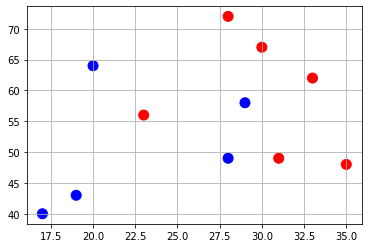

In [89]:
# データ
# 温度，湿度，暑い(1)or暑くない(0)
import numpy as np

data = np.array([
    [17,40,0],
    [19,43,0],
    [20,64,0],
    [23,56,1], # わざと，このとき「暑い」というように，間違ったデータがトレーニングデータにあるとしよう．
    [28,72,1],
    [28,49,0],
    [29,58,0],
    [30,67,1],
    [31,49,1],
    [33,62,1],
    [35,48,1]])

import matplotlib.pyplot as plt

plt.scatter(data[:,0], data[:,1],s=100,c=['b' if i==0 else 'r' for i in data[:,2]])
# グリッド表示
plt.grid(True)

# 表示
plt.show()

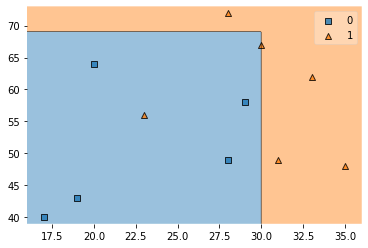

In [91]:
from sklearn import tree

# 決定木に特徴ベクトルと教師信号を与える
X = data[:,[0,1]]
y = data[:,2]

# モデルを作成
model = tree.DecisionTreeClassifier(max_depth=2)
model = model.fit(X, y)

predicted = model.predict(X)

tree.export_graphviz(model, out_file = 'temp.dot')
# dot -Tpdf temp.dot -o temp.pdf
# dot -Tjpg temp.dot -o temp.jpg

from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X, y, model)

![depth2_wrong](work/depth2_wrong.jpg)

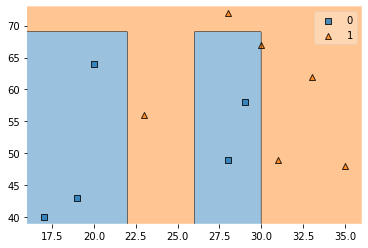

In [92]:
from sklearn import tree

# 決定木に特徴ベクトルと教師信号を与える
X = data[:,[0,1]]
y = data[:,2]

# モデルを作成
model = tree.DecisionTreeClassifier() # 深さを指定しない．この場合，完全に分割するまで学習を行う．通常，過学習になる．
model = model.fit(X, y)

predicted = model.predict(X)

tree.export_graphviz(model, out_file = 'temp.dot')
# dot -Tpdf temp.dot -o temp.pdf
# dot -Tjpg temp.dot -o temp.jpg

from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X, y, model)

![depth3](work/depth3.jpg)

決定木の弱点は，深さを適切に設定しないと過学習してしまうことである．この例では，温度23度，湿度56％のとき，「暑い」という間違った(?)教師信号を与えたため，これを学習するために，深さ4の決定木を作成してしまった．そのせいで，温度が21．5度以上25.5度以下のとき，湿度に関係なく暑いという結果になってしまった．

これを避けるために，第5章で述べる集団学習がある．

# もっと大きなデータで行ってみる．

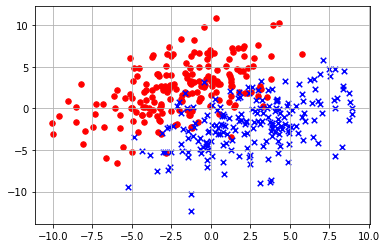

In [93]:
# 魚データ
# 特徴ベクトル：2次元（体長, 体重）
# ラベル数：2（サケ(A)とスズキ(B)）

# 確率密度関数で生成
# 分散共分散行列で楕円を指定
# ただし，データのオーバーラップを生じさせて，難しくする．
# トレーニングデータとテストデータを作成する．

import numpy as np
import pandas as pd

# 乱数の種を初期化
np.random.seed(0)

# データ数
numA = 200 # Aをサケ
numB = 200 # Bをスズキ
numAll = numA + numB

# 平均
muA = [-2,2]
muB = [2,-2]

# 共分散
cov = [[10,5],[5,10]]

# 入力信号を生成
xA, yA = np.random.multivariate_normal(muA, cov, numA).T
xB, yB = np.random.multivariate_normal(muB, cov, numB).T

# 教師信号を生成
clsA = [1 for i in range(numA)]
clsB = [0 for i in range(numB)]

# DataFrameに変換
dfA = pd.DataFrame(np.array([xA,yA,clsA]).T, columns=['cm','kg','cls'])
dfB = pd.DataFrame(np.array([xB,yB,clsB]).T, columns=['cm','kg','cls'])
dfAll = pd.concat([dfA,dfB],axis=0)
dfAll = dfAll.reset_index(drop=True)

# 散布図をプロットする
for i in range(len(dfAll)):
    if dfAll.cls[i]==1:
        plt.scatter(dfAll.cm[i],dfAll.kg[i], color='r',marker='o', s=30)
    else:
        plt.scatter(dfAll.cm[i],dfAll.kg[i], color='b',marker='x', s=30)
plt.grid(True)
plt.show()

In [94]:
# データをトレーニングデータとテストデータに分ける．
from sklearn.model_selection import train_test_split
X = dfAll[['cm','kg']].values
y = dfAll[['cls']].values
y = y.reshape(len(y),) # ベクトルにする
y = np.array(y, dtype=np.int64)

X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=0)

## 深さ4の決定木

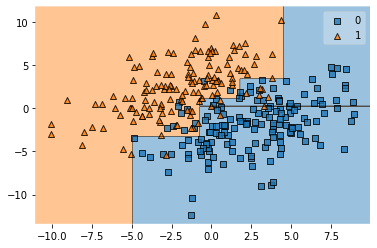

In [130]:
# モデルを作成
model = tree.DecisionTreeClassifier(max_depth=4)
model = model.fit(X_train, y_train)

predicted = model.predict(X_train)

tree.export_graphviz(model, out_file = 'temp.dot')
# dot -Tpdf temp.dot -o temp.pdf
# dot -Tjpg temp.dot -o temp.jpg

from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X_train, y_train, model)

In [123]:
print('正解率(train):{:.3f}'.format(model.score(X_train,y_train)))

正解率(train):0.937


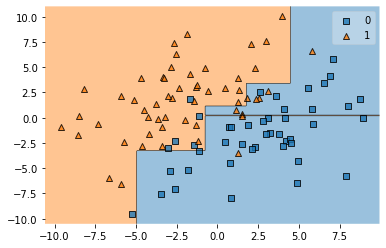

In [124]:
predicted = model.predict(X_test)

from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X_test, y_test, model)

In [125]:
print('正解率(train):{:.3f}'.format(model.score(X_test,y_test)))

正解率(train):0.850


## 深さ20の決定木

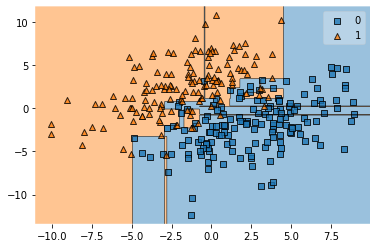

In [126]:
# モデルを作成
model = tree.DecisionTreeClassifier(max_depth=20)
model = model.fit(X_train, y_train)

predicted = model.predict(X_train)

tree.export_graphviz(model, out_file = 'temp.dot')
# dot -Tpdf temp.dot -o temp.pdf
# dot -Tjpg temp.dot -o temp.jpg

from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X_train, y_train, model)

In [127]:
print('正解率(train):{:.3f}'.format(model.score(X_train,y_train)))

正解率(train):1.000


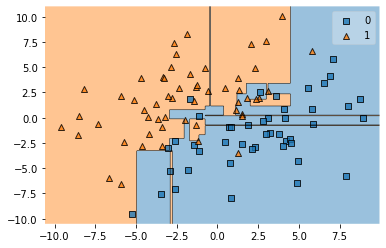

In [128]:
predicted = model.predict(X_test)

from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X_test, y_test, model)

In [129]:
print('正解率(test):{:.3f}'.format(model.score(X_test,y_test)))

正解率(test):0.840


### まとめ

決定木は，過学習するため，適切に深さを設定する必要がある．

|決定木|Train|Test|
|---|---|---|
|深さ=4|0.937|0.850|
|深さ=20|1.000|0.840|


![depth20](work/depth4.jpg)

![depth20](work/depth20.jpg)